## We use a dataset of 4898 wines and its 12 correspondent attributes to build a DECISION TREE model that will predict the quality of wine 

![image of wine](https://cdn.shopify.com/s/files/1/1373/7347/articles/defining-quality_1024x1024.jpg?v=1481143175)

In [1]:
#Import modules and build dataframe
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\nique\\PycharmProjects\\untitled\\mlintro\\data\\winequality-white.csv', 
                 names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"], 
                 skiprows = 1, sep = ';', engine = 'python')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.shape

(4898, 12)

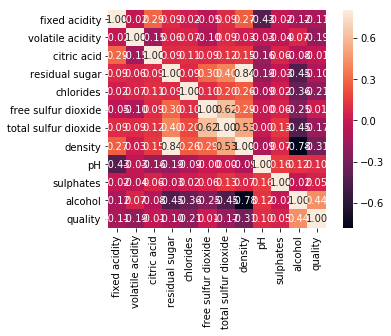

In [3]:
#Open graph modules to build corr matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corrmat = df.corr()
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, fmt = '.2f')
plt.show()

In [4]:
#Begin to build our classifier
X = df.drop(['quality'], axis = 1) #we use all columns except the one we are dropping, to be used as response column
y = df['quality']

#IMPORTANT NOTE: we could get even better results by dropping cols that are not strongly correlated with quality, as below
# X = df.drop(['quality','density', 'total sulfur dioxide', 'sulphates', 'chlorides', 'volatile acidity'], axis = 1) #we use all columns except the one we are dropping, to be used as response column
# y = df['quality']
#For the purpose of this exercise, however, we'll leave the code "as is"

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
#no we instantiate our classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =5)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
# now we train the model by fitting the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
#we print the score to see how accurate our model is
score = clf.score(X_test, y_test)
score

0.5112244897959184

In [8]:
# How many features did our model use to get to that score?
clf.n_features_

11

In [9]:
# What's the weight that our model assigned to each feature?
clf.feature_importances_

array([0.02471176, 0.22230501, 0.01057677, 0.01784109, 0.02340822,
       0.12623614, 0.00695354, 0.01399385, 0.03494986, 0.02030465,
       0.4987191 ])

In [10]:
#now we create the tree file
import sklearn.tree as tree
tree.export_graphviz(clf, out_file = 'tree.dot', feature_names = X.columns)

In [11]:
#since the previous graphic representatin of the tree is on the folder we've open, 
#we change with this code the location of the tree file to the folder our notebook is in
# from subprocess import call
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

0 . 0.4173469387755102
1 . 0.4959183673469388
2 . 0.4969387755102041
3 . 0.49489795918367346
4 . 0.5112244897959184
5 . 0.5040816326530613
6 . 0.5173469387755102
7 . 0.5142857142857142
8 . 0.523469387755102
9 . 0.5479591836734694
10 . 0.5510204081632653
11 . 0.5438775510204081
12 . 0.539795918367347
13 . 0.5489795918367347
14 . 0.5520408163265306
15 . 0.5693877551020409
16 . 0.576530612244898
17 . 0.576530612244898
18 . 0.5806122448979592
19 . 0.5846938775510204
20 . 0.5826530612244898
21 . 0.5795918367346938
22 . 0.5755102040816327
23 . 0.5836734693877551
24 . 0.573469387755102
25 . 0.576530612244898
26 . 0.5744897959183674
27 . 0.5867346938775511
28 . 0.5785714285714286
29 . 0.5806122448979592


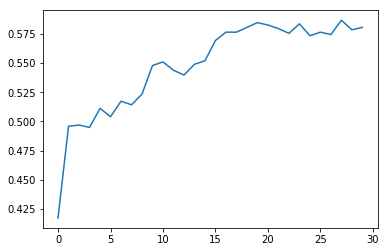

In [12]:
#Now we go back above and try to improve our model by max_depth with different values until we find the one with the highest score 
#clf = DecisionTreeClassifier(max_depth =22)

scores = []
depth_values = range(1,31)
for value in depth_values:
    clf = DecisionTreeClassifier(max_depth =value)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(value-1, '.', score)
    scores.append(score)

plt.plot(scores)    

In [13]:
#It appears that the best value is 19. We double check that this figure is correct
clf = DecisionTreeClassifier(max_depth =24)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score    

0.5714285714285714

In [14]:
#Value of 19 for max_depth is correct to get us the best results
#Note that as mentioned before, we could get better results by dropping columns not strongly correlated to "quality" at initial step in the process

## From the previous graph we can see that for this problem, on a first run and using a Decision Tree Classifier, we get the best predictive results by using a max_depth of 24